# W2: PCA and SOM

#### PCA
1. Reduce dimensionality with PCA
2. Analyse K-Prototype with and without dimensionality reduction

#### SOM
3. Analyse SOM as a clustering algorithm
4. Compare K-Prototype and SOM


Maximum number of pages: 16!
(alguns locos en el primer projecte n'han fet 60 xD)

-----------------

## PCA

In [20]:
from utils.dataset import read_dataset

import os

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns # for plotting categorical data


In [21]:
dataset = read_dataset('adult')
data = dataset['data']

df = pd.DataFrame(data)
df = df.sample(n=5000, replace=False, random_state=1).reset_index(drop=True)

df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Real Y labels
y = df['class'].copy()
x = df.drop(columns=['class'])

categorical_features = ['workclass',
                        'education',
                        'marital-status',
                        'occupation',
                        'relationship',
                        'race',
                        'sex',
                        'native-country']

numerical_features = ['age',
                      'fnlwgt',
                      'education-num',
                      'capital-gain',
                      'capital-loss',
                      'hours-per-week']

x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,31.0,Private,224234.0,HS-grad,9.0,Never-married,Transport-moving,Own-child,Black,Male,0.0,0.0,40.0,United-States
1,25.0,Private,149486.0,HS-grad,9.0,Never-married,Machine-op-inspct,Unmarried,Black,Male,0.0,0.0,40.0,United-States
2,36.0,Self-emp-not-inc,343721.0,Doctorate,16.0,Never-married,Prof-specialty,Not-in-family,White,Male,0.0,0.0,30.0,?
3,26.0,?,131777.0,Bachelors,13.0,Married-civ-spouse,?,Husband,White,Male,0.0,2002.0,40.0,United-States
4,30.0,Local-gov,44566.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States


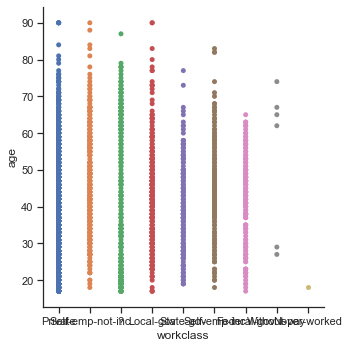

In [25]:
#fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,10))

#x.plot(x=numerical_features[0], y=numerical_features[1], kind='scatter', ax=ax[0][0])
#x.plot(x=numerical_features[2], y=numerical_features[3], kind='scatter', ax=ax[0][1])
#x.plot(x=numerical_features[4], y=numerical_features[5], kind='scatter', ax=ax[1][0])

sns.set(style="ticks", color_codes=True)
sns.catplot(x=categorical_features[0], y=numerical_features[0], jitter=False, data=x);
